<a href="https://colab.research.google.com/github/yehezkielermanto/classification-image/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#download dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-20 05:24:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.81MB/s    in 49s     

2021-07-20 05:25:17 (6.34 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#melakukan ekstrasi pada file zip
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#menetapkan direktori dataset yang akan digunakan ke dalam variabel
base_path = '/tmp/rockpaperscissors/rps-cv-images/'

In [ ]:
#membuat image data generator
from keras.preprocessing.image import ImageDataGenerator

#membuat validation generator
val_generator = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   height_shift_range = .2,
                                   validation_split = 0.4, #membagi dataset menjadi 40% validation 60% training
                                   fill_mode = 'wrap',
                                   shear_range = 0.2,
                                   rotation_range = 30,)

#membuat training generator
train_generator = ImageDataGenerator(rescale = 1./255,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     height_shift_range = .2,
                                     validation_split = 0.4, #membagi dataset menjadi 40% validation 60% training
                                     fill_mode = 'wrap',
                                     shear_range = 0.2,
                                     rotation_range = 30,)

#menyiapkan variabel untuk melatih model
train_image = train_generator.flow_from_directory(base_path,
                                                  target_size=(100, 150),
                                                  classes=['paper', 'rock', 'scissors'],
                                                  class_mode='categorical',
                                                  subset='training',
                                                  shuffle=True,
                                                  color_mode = "rgb")

val_image = val_generator.flow_from_directory(base_path,
                                              target_size=(100, 150),
                                              classes=['paper', 'rock', 'scissors'],
                                              class_mode='categorical',
                                              subset='validation',
                                              shuffle=True,
                                              color_mode = "rgb")

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
#membuat arsitektur CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(3, activation = 'softmax')])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 8, 15, 256)      

In [ ]:
#memanggil fungsi compile untuk meng-compile arsitektir CNN
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])

In [ ]:
# callbacks, menghentikan training apabila sudah memenuhi akurasi yang diinginkan
#akurasi yang diharapkan >=96%
accuracy_threshold = 96e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nUntuk Epoch -', epoch, '\nAccuracy mencapai = %2.2f%%' %(logs['accuracy']*100), 'pelatihan model dihentikan.')
            self.model.stop_training = True

# melatih model yang sudah dibuat
check_training = model.fit(train_image,
                           epochs = 20,
                           validation_data = val_image,
                           validation_steps = 5,
                           verbose = 1,
                           callbacks = [my_callbacks()])

Epoch 1/20
42/42 [==============================] - 45s 1s/step - loss: 1.0575 - accuracy: 0.4361 - val_loss: 0.9490 - val_accuracy: 0.5125
Epoch 2/20
42/42 [==============================] - 43s 1s/step - loss: 0.7275 - accuracy: 0.6857 - val_loss: 0.5550 - val_accuracy: 0.7563
Epoch 3/20
42/42 [==============================] - 44s 1s/step - loss: 0.3699 - accuracy: 0.8615 - val_loss: 0.2737 - val_accuracy: 0.9062
Epoch 4/20
42/42 [==============================] - 44s 1s/step - loss: 0.2967 - accuracy: 0.8896 - val_loss: 0.3158 - val_accuracy: 0.8750
Epoch 5/20
42/42 [==============================] - 43s 1s/step - loss: 0.2658 - accuracy: 0.9026 - val_loss: 0.3493 - val_accuracy: 0.9000
Epoch 6/20
42/42 [==============================] - 43s 1s/step - loss: 0.2442 - accuracy: 0.9140 - val_loss: 0.1981 - val_accuracy: 0.9375
Epoch 7/20
42/42 [==============================] - 44s 1s/step - loss: 0.2219 - accuracy: 0.9231 - val_loss: 0.2702 - val_accuracy: 0.9187
Epoch 8/20
42/42 [==

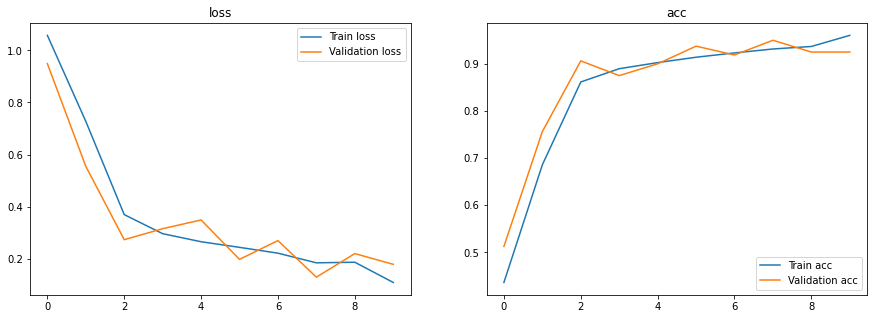

In [ ]:
#visualisasi training model yang dilakukan untuk melihat apakah sudah sesuai dengan yang diharapkan
import numpy as np
import matplotlib.pyplot as plt

def show_final_history(check_training):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(check_training.epoch, check_training.history["loss"], label="Train loss")
    ax[0].plot(check_training.epoch, check_training.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(check_training.epoch, check_training.history["accuracy"], label="Train acc")
    ax[1].plot(check_training.epoch, check_training.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

show_final_history(check_training)

Saving 0vugygEjxQJPr9yz.png to 0vugygEjxQJPr9yz (1).png
[0]
Model memprediksi ini adalah: paper


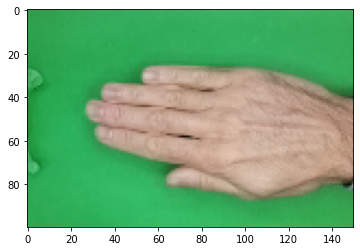

In [ ]:
#mulai mencoba prediksi gambar
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  #predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 32)
  pr = np.argmax(classes, axis=1)

  print(pr)
  if pr == 0:
    print('Model memprediksi ini adalah: paper')
  elif pr == 1:
    print('Model memprediksi ini adalah: rock')
  elif pr == 2:
    print('Model memprediksi ini adalah: scissors')